In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('/home/gbhure/Data/titanic.csv')

In [16]:
def get_new_age(x):
    a = x[0]
    p = x[1]
    if pd.isnull(a):
        if p == 1:
            return 39
        elif p == 2:
            return 30
        else:
            return 23
    else:
        return a

df.Age = df[['Age', 'Pclass']].apply(get_new_age, axis=1)

In [21]:
df[df['Pclass'] == 3]['Age'].mean()

24.547698574338085

In [25]:
def get_new_age(x):
    a = x[0]
    p = x[1]
    if pd.isnull(a):
        return df[df['Pclass'] == p]['Age'].mean()
    else:
        return a

df.Age = df[['Age', 'Pclass']].apply(get_new_age, axis=1)

In [91]:
df.Age = df[['Age', 'Pclass']].apply(lambda x: df[df['Pclass'] == x[1]]['Age'].mean() \
                                     if pd.isnull(x[0]) else x[0], axis=1)

In [ ]:
# df.Age = df.apply(lambda x: df[df['Pclass'] == x[2]['Age'].mean() \
#                                     if pd.isnull(x[5]) else x[5], axis=1)

In [30]:
# df.head(30)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [93]:
df.dropna(inplace=True) # homework -- fill embarked with mode value

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [64]:
df.Sex = df.Sex.map({'male': 1, 'female': 0})

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [66]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
df.Embarked = df.Embarked.map({'S':0, 'C':1, 'Q':2})

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [94]:
emb = pd.get_dummies(df['Embarked'], drop_first=True)
sex = pd.get_dummies(df['Sex'], drop_first=True)
# pd.get_dummies(df['Embarked'], drop_first=True)

In [95]:
df = pd.concat([df, sex, emb], axis=1)

In [75]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [99]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
# y = f(x1,x2,x3)

In [81]:
len(df)

889

In [100]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [101]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [102]:
X.shape

(889, 8)

In [87]:
type(y)

pandas.core.series.Series

In [83]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [104]:
X_train.shape

(711, 8)

In [ ]:
Regression Analysis
-------
y = f(x) -- if 1 independent -- simple linear regression
if 2 or more independent variable -- multiple linear regression

Linear regression -- y = f(x1,x2,x2..)
y is a function of x1, x2, x3.. 

y = mx + c --> linear regression

Non-linear (polynomial)
y = f(x) -- 

In [7]:
y = bx + a
y = mx + c

In [122]:
df = pd.read_csv('/home/gbhure/Data/Salary_Data.csv')

In [123]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary = b1 * experience + b0
b1 --> coefficient (slope of the line)
b0 --> constant

In [124]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [108]:
df.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [144]:
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [145]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [133]:
X = df.iloc[:, :1].values
#X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [134]:
X.shape

(30, 1)

In [135]:
y.shape

(30,)

In [136]:
len(df)

30

In [146]:
X[:10]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2],
       [2.9],
       [3. ],
       [3.2],
       [3.2],
       [3.7]])

In [147]:
y[:10]

array([39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445,
       57189])

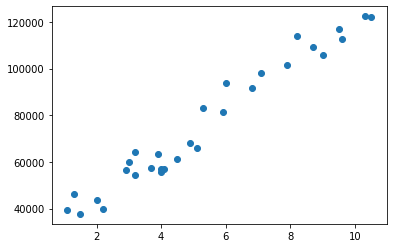

In [148]:
plt.scatter(X, y)

In [140]:
# Best fit line to predict the future
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [141]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
model.coef_

array([9449.96232146])

In [143]:
model.intercept_

25792.20019866871

In [152]:
# y = b1*x + b0
# 25792*2.5 + 9449

In [153]:
X.shape

(30, 1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [155]:
model = LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
y_pred = model.predict(X_test)

In [158]:
y_test

array([83088, 98273, 63218, 93940, 61111, 91738])

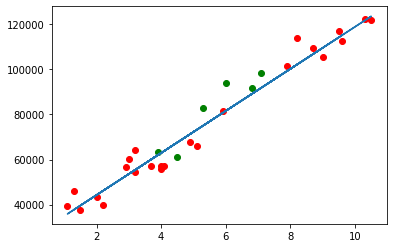

In [162]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train))
plt.scatter(X_test, y_test, color='green')

In [164]:
np.mean((y_test - y_pred)**2)

51338023.49224842

In [165]:
import math
math.sqrt(51338023.49224842)

7165.055721503387

In [166]:
new_data = np.array([[2.5], [8], [7], [18]])

In [167]:
new_data

array([[ 2.5],
       [ 8. ],
       [ 7. ],
       [18. ]])

In [168]:
model.predict(new_data)

array([ 48942.25984334, 100273.4559023 ,  90940.5111643 , 193602.90328222])

In [169]:
from sklearn.datasets import load_boston
# from math import sqrt
# a = sqrt(25)

In [173]:
boston = load_boston()

In [174]:
type(boston)

sklearn.utils.Bunch

In [175]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [171]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [176]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# y = f(x1, x2, x3...)
# y = f('CRIM', 'ZN', ...)

In [177]:
# df = pd.DataFrame
type(boston.data)

numpy.ndarray

In [178]:
boston.data[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [179]:
df = pd.DataFrame(boston.data)

In [180]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [181]:
df.columns = boston.feature_names

In [182]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [183]:
df['Price'] = boston.target

In [184]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [191]:
df.rename(columns={'Price': 'PRICE'}, inplace=True)

In [192]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [193]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [ ]:
# lr_boston = LinearRegression()
# lr_boston.fit(boston.data, boston.target)

In [194]:
X = boston.data
# X = df.iloc[:, :-1]
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [195]:
lr_boston = LinearRegression()
lr_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
lr_boston.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [198]:
lr_boston.intercept_

37.91248700975062

In [ ]:
y = b0 + b1*X1 + b2*X2 + b3*X3 ... 

In [ ]:
Classfication
------
Logistic regression
decision tree
random forest

Confustion matrix
SVM
Naive Bayes